# COVID19 Tweets EDA

- using data from Sun March 15 - Sat March 21

In [7]:
import gzip, os, re
import json
from datetime import datetime
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
print(os.getcwd())

/Users/mashabelyi/UCBerkeley/courses/Spring_2020/InfoViz/project/notebooks


In [73]:
tweets = pd.read_csv('../tweets.0315-0321.csv', error_bad_lines=False)
# tweets = pd.read_csv('../tweets.csv', error_bad_lines=False)
print(tweets.shape)
tweets.head()

b'Skipping line 59517: expected 23 fields, saw 28\n'
b'Skipping line 342534: expected 23 fields, saw 32\nSkipping line 355993: expected 23 fields, saw 30\n'


(425587, 23)


,tweetId,lang,userId,user_screen_name,year,month,date,day,hour,minute,...,user_mentions,symbols,urls,retweet_cont,favorite_count,lat,long,user_location,place_name,place_bbox
0,1240008837261910028,en,48575013,AngeHoog,2020,3,17,1,20,15,...,NaN,NaN,NaN,1,2,NaN,NaN,Zuid-Holland; Zoetermeer,NaN,NaN
1,1240008840751562753,en,806585567001640960,MandaThieu,2020,3,17,1,20,15,...,NaN,NaN,NaN,0,0,NaN,NaN,Philadelphia; PA,NaN,NaN
2,1240008841045172225,en,939246334980382720,anguwu,2020,3,17,1,20,15,...,Change,NaN,chng.it,21,34,NaN,NaN,Honeymoon Ave,NaN,NaN
3,1240008841279963143,en,1222795056878444544,norfldn641,2020,3,17,1,20,15,...,NaN,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN
4,1240008845059121155,en,1401177481,CityofChanMN,2020,3,17,1,20,15,...,NaN,NaN,ow.ly,0,1,NaN,NaN,Chanhassen; MN,NaN,NaN


**Check number of NaNs in each column**

In [74]:
tweets.isna().sum()

tweetId                  0
lang                     0
userId                   0
user_screen_name         0
year                     0
month                    0
date                     0
day                      0
hour                     0
minute                   0
utc_offset               0
text                   815
hashtags            303661
user_mentions       236739
symbols             424970
urls                275630
retweet_cont             0
favorite_count           0
lat                 424455
long                424455
user_location       117592
place_name          410634
place_bbox          410634
dtype: int64

**Check column types**

In [478]:
tweets.dtypes

tweetId               int64
lang                 object
userId                int64
user_screen_name     object
year                  int64
month                 int64
date                  int64
day                   int64
hour                  int64
minute                int64
utc_offset           object
text                 object
hashtags             object
user_mentions        object
symbols              object
urls                 object
retweet_cont          int64
favorite_count        int64
lat                 float64
long                float64
user_location        object
place_name           object
place_bbox           object
dtype: object

In [ ]:
# tweets[tweets.text.isna()].head()

## Hashtags - Usage over Time

In [504]:
hashtags = [x.split() for x in tweets.hashtags if type(x)==str]
hashtag_counter = Counter()
for tags in hashtags:
    for tag in tags:
        hashtag_counter[tag.lower()] += 1
        
print("{} unique hashtags in {} tweets".format(len(hashtag_counter), len(hashtags)))
print("Top hashtags:")
hashtag_counter.most_common(10)

58925 unique hashtags in 121926 tweets
Top hashtags:


[('coronavirus', 39748),
 ('covid19', 33414),
 ('covidー19', 6926),
 ('socialdistancing', 4757),
 ('coronavirusoutbreak', 4044),
 ('covid', 3331),
 ('corona', 3275),
 ('covid_19', 3056),
 ('covid2019', 2448),
 ('quarantinelife', 2262)]

Count how many times each hashtag is used every day. This takes a little bit longer to run.

In [505]:
hashtag_by_date = defaultdict(lambda: defaultdict(int))
for idx, row in tweets[~tweets.hashtags.isnull()].iterrows():
    date = row['date']
    tags = row['hashtags'].split()
    for t in tags:
        hashtag_by_date[t][date] += 1
    

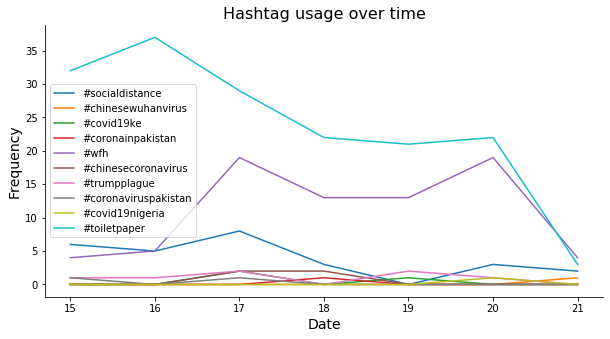

In [509]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Hashtag usage over time', fontsize=16)

dates = [15,16,17,18,19,20,21]
labels = []
for tag, freq in hashtag_counter.most_common()[100:110]:
    counts = [hashtag_by_date[tag][date] for date in dates]
    labels.append('#'+tag)
#     print(tag, dates, counts)
    ax.plot(dates, counts)

ax.legend(labels)
plt.show()
    
    
    

## Sentiment Analysis

[VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)

Do NOT use the nltk built-in version of Vader. It doesn't hndle punctuation and emojis well (see below).

Instead install vaderSentiment directly with 
```
pip install vaderSentiment
```

In [79]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [66]:
print("vaderSentiment:")
print(analyser.polarity_scores('I am 😄  today'))
print(analyser.polarity_scores('This is so exciting!!!!'))

print('\nltk:')
print(sent.polarity_scores('I am 😄  today'))
print(sent.polarity_scores('This is so exciting!!!!'))

vaderSentiment:
{'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.6705}
{'neg': 0.0, 'neu': 0.362, 'pos': 0.638, 'compound': 0.7418}

ltk:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Create a new `sentiment` column with the compound score returned from the VADER Sentiment Analyzer tool.

In [67]:
def get_sentiment(row):
    try:
        return analyser.polarity_scores(row['text'])['compound']
    except:
        # if text is nan -> return nan
        return np.nan

tweets['sentiment'] = tweets.apply(lambda row: get_sentiment(row), axis=1)

Count number of positive, negative, neutral tweets by date

In [68]:
def sentiment_cat(v):
    if v > 0.1:
        return 'positive'
    elif v < -0.1:
        return 'negatvie'
    else:
        return 'neutral'
    
sentiment_by_day = defaultdict(lambda: defaultdict(int))
for idx, row in tweets[~tweets.text.isnull()].iterrows():
    date = row['date']
    sentiment = row['sentiment']
    sentiment_by_day[date][sentiment_cat(sentiment)] += 1

In [69]:
totals = {d:sum(sentiment_by_day[d].values()) for d in sentiment_by_day}
totals

{17: 67207, 18: 62817, 20: 80326, 15: 61350, 19: 71412, 16: 66463, 21: 15197}

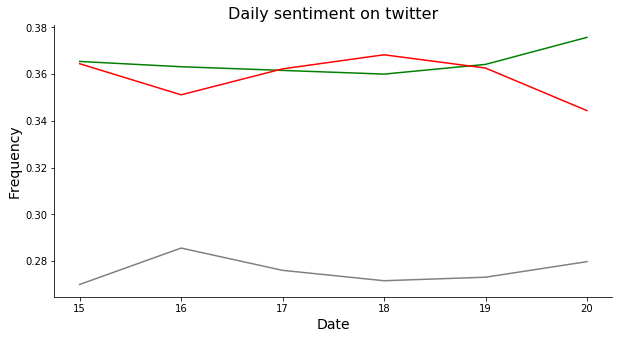

In [70]:
dates = [15,16,17,18,19,20]
pos = [1.0*sentiment_by_day[d]['positive']/totals[d] for d in dates]
neg = [1.0*sentiment_by_day[d]['negatvie']/totals[d] for d in dates]
neu = [1.0*sentiment_by_day[d]['neutral']/totals[d] for d in dates]

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Daily sentiment on twitter', fontsize=16)

plt.plot(dates, pos, 'g')
plt.plot(dates, neg, 'r')
plt.plot(dates, neu, 'grey')

plt.show()

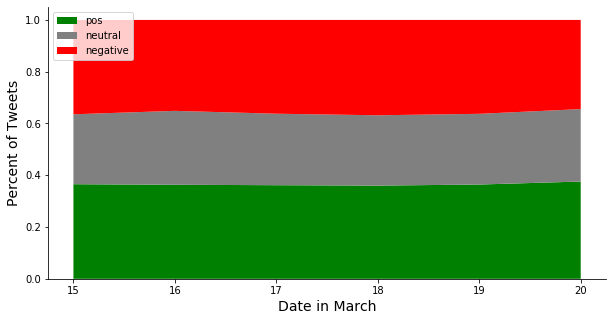

In [71]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.stackplot(dates,[pos, neu,neg], labels=['pos','neutral','negative'], colors=['g', 'grey', 'r'])
ax.legend(loc='upper left')
ax.set_xlabel('Date in March', fontsize=14)
ax.set_ylabel('Percent of Tweets', fontsize=14)
plt.show()


In [91]:
tweet_text = tweets.text.values
for i in range(10):
    print('\n',tweet_text[i])
    print(analyser.polarity_scores(tweet_text[i]))
    


 We stand by Italy during these trying times. Share your Support for our Italian friends  They are our colleagues  friends and family. Cari amici  siamo con voi. #COVID19 #WeStandWithItaly
{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.8779}

 Visual art students from Art 350 intermediate painting zooms in to talk about their future project with a lot of modifications due to lack of supplies. Most of these students heavily relied on campus resources like the woodshop in the Visual Arts building. #covid19
{'neg': 0.049, 'neu': 0.897, 'pos': 0.053, 'compound': 0.0516}

 University of Virginia : Request To Make UVA Spring 2020 Classes Pass/Fail An Option Due to COVID-19 - Sign the Petition!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

 What’s this lot gonna do when everyone has coronavirus #EastEnders
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

 Find city news  updates on services  facilities  schedule changes  COVID-19 information  important numbers and more